<a href="https://colab.research.google.com/github/fadeevie/mnist_ml/blob/main/%D0%A4%D0%B0%D0%B4%D0%B5%D0%B5%D0%B2%D0%98%D0%95_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Цель работы*

Целью данной лабораторной работы является изучение нескольких алгоритмов машинного обучения для классификации изображений рукописных цифр из набора данных MNIST.

*Задачи работы*

Изучить набор данных MNIST и его структуру
Изучить и реализовать несколько алгоритмов машинного обучения для классификации MNIST
Обучить модели на наборе данных MNIST
Оценить качество работы моделей и сравнить результаты
Предложить улучшения и оптимизации для моделей

*Набор данных MNIST*

Набор данных MNIST является стандартным набором данных для задач распознавания образов. Он состоит из 70 000 изображений рукописных цифр от 0 до 9, каждое изображение имеет размер 28x28 пикселей.

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Загрузка и нормализация данных

In [ ]:
mnist = fetch_openml('mnist_784')

# Создаем датафрейм из данных MNIST
X = pd.DataFrame(mnist.data)
y = pd.Series(mnist.target)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Визуализация данных

Text(0.5, 1.0, 'Label: 8')

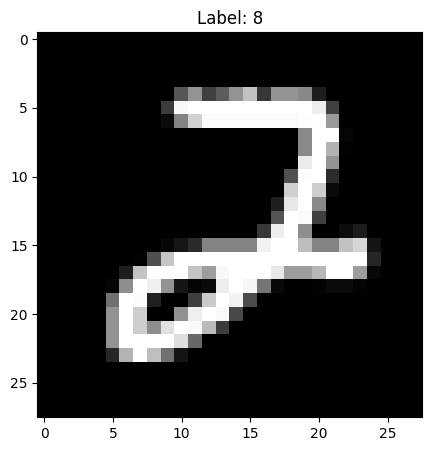

In [ ]:
# Отображение случайного изображения из обучающего набора данных
plt.figure(figsize=(5,5))
index = np.random.choice(X_train.shape[0])
plt.imshow(X_train.iloc[index].values.reshape(28,28), cmap='gray')
plt.title('Label: {}'.format(y_train[index]))

Реализация и обучение моделей

In [ ]:
# Метод KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

# Метод Logistic regression
reg = LogisticRegression(max_iter=1000, C=1.0)
reg.fit(X_train, y_train)
y_reg_pred = reg.predict(X_test)

# Метод Decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc_pred = dtc.predict(X_test)

# Метод Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)

# Метод Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)

# Метод Support Vector Machine
svc = SVC(C=1.0)
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оценка качества моделей

In [ ]:
# Метрики для KNN
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_precision = precision_score(y_test, y_knn_pred, average='weighted')
knn_recall = recall_score(y_test, y_knn_pred, average='weighted')
knn_f1 = f1_score(y_test, y_knn_pred, average='weighted')
#knn_confusion_matrix = confusion_matrix(y_test, y_knn_pred)

# Метрики для Logistic regression
reg_accuracy = accuracy_score(y_test, y_reg_pred)
reg_precision = precision_score(y_test, y_reg_pred, average='weighted')
reg_recall = recall_score(y_test, y_reg_pred, average='weighted')
reg_f1 = f1_score(y_test, y_reg_pred, average='weighted')
#reg_confusion_matrix = confusion_matrix(y_test, y_reg_pred)

# Метрики для Decision tree
dtc_accuracy = accuracy_score(y_test, y_dtc_pred)
dtc_precision = precision_score(y_test, y_dtc_pred, average='weighted')
dtc_recall = recall_score(y_test, y_dtc_pred, average='weighted')
dtc_f1 = f1_score(y_test, y_dtc_pred, average='weighted')
#dtc_confusion_matrix = confusion_matrix(y_test, y_dtc_pred)

# Метрики для Random Forest
rfc_accuracy = accuracy_score(y_test, y_rfc_pred)
rfc_precision = precision_score(y_test, y_rfc_pred, average='weighted')
rfc_recall = recall_score(y_test, y_rfc_pred, average='weighted')
rfc_f1 = f1_score(y_test, y_rfc_pred, average='weighted')
#rfc_confusion_matrix = confusion_matrix(y_test, y_rfc_pred)

# Метрики для Naive Bayes
gnb_accuracy = accuracy_score(y_test, y_gnb_pred)
gnb_precision = precision_score(y_test, y_gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, y_gnb_pred, average='weighted')
gnb_f1 = f1_score(y_test, y_gnb_pred, average='weighted')
#gnb_confusion_matrix = confusion_matrix(y_test, y_gnb_pred)

# Метрики для Support Vector Machine
svc_accuracy = accuracy_score(y_test, y_svc_pred)
svc_precision = precision_score(y_test, y_svc_pred, average='weighted')
svc_recall = recall_score(y_test, y_svc_pred, average='weighted')
svc_f1 = f1_score(y_test, y_svc_pred, average='weighted')
#svc_confusion_matrix = confusion_matrix(y_test, y_svc_pred)

print("KNN:")
print(classification_report(y_test, y_knn_pred))
print("Logistic Regression:")
print(classification_report(y_test, y_reg_pred))
print("Decision Tree:")
print(classification_report(y_test, y_dtc_pred))

KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      138

In [ ]:
print("Random Forest:")
print(classification_report(y_test, y_rfc_pred))
print("Naive Bayes:")
print(classification_report(y_test, y_gnb_pred))
print("SVM:")
print(classification_report(y_test, y_svc_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1

Сравнение результатов

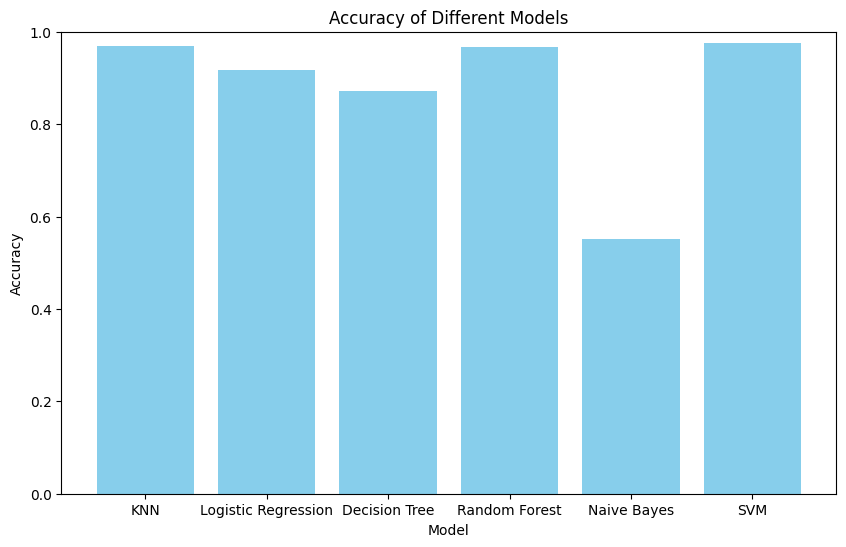

In [ ]:
# Построение графиков для сравнения результатов
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
accuracy_scores = [knn_accuracy, reg_accuracy, dtc_accuracy, rfc_accuracy, gnb_accuracy, svc_accuracy]
precision_scores = [knn_precision, reg_precision, dtc_precision, rfc_precision, gnb_precision, svc_precision]
recall_scores = [knn_recall, reg_recall, dtc_recall, rfc_recall, gnb_recall, svc_recall]
f1_scores = [knn_f1, reg_f1, dtc_f1, rfc_f1, gnb_f1, svc_f1]

# График accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1.0)  # Ограничение y-оси для лучшей визуализации
plt.show()

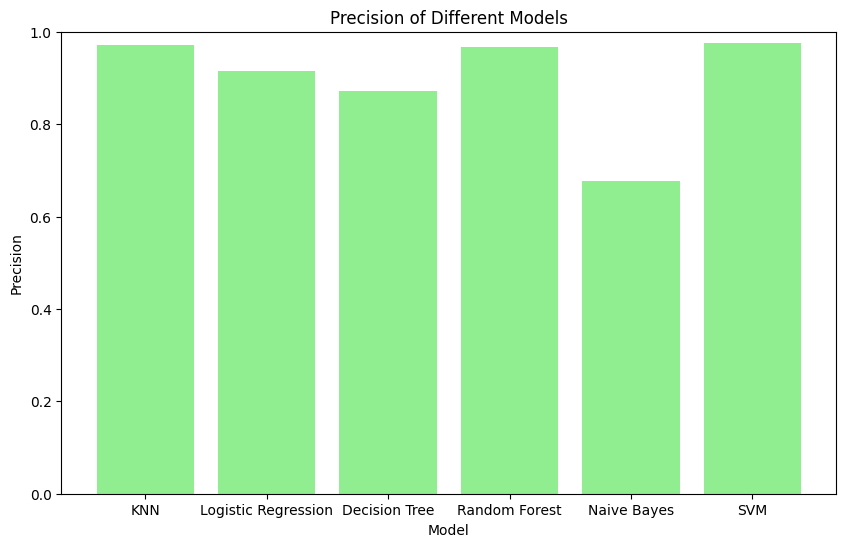

In [ ]:
# График Precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1.0)
plt.show()

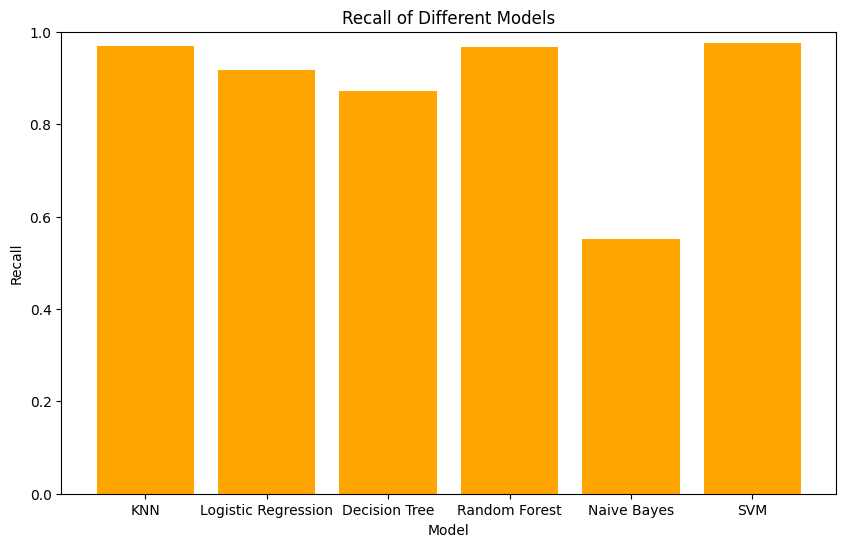

In [ ]:
# График Recall
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores, color='orange')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0, 1.0)
plt.show()

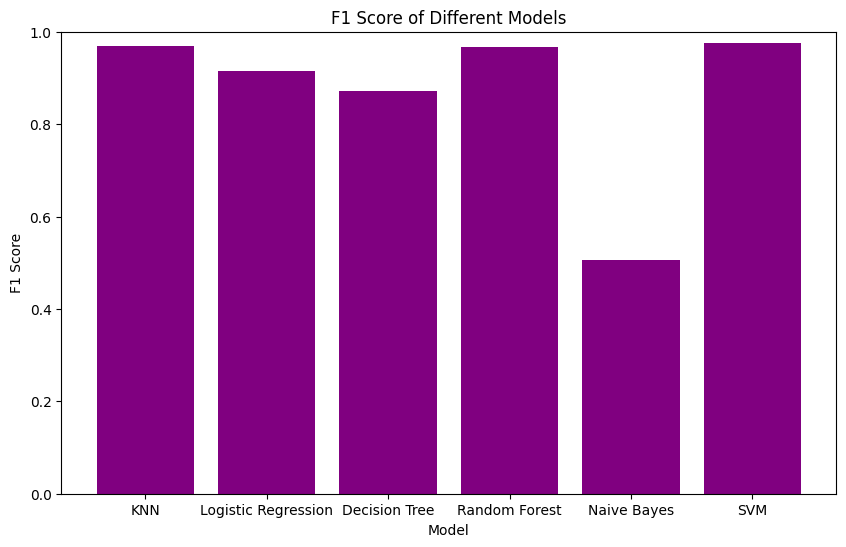

In [ ]:
# График F1 Score
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='purple')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.ylim(0, 1.0)
plt.show()

**Выводы**

С помощью полученным результатам можно сделать вывод о том, что методы KNN, Random Forest, SVM, наилучшим образом подходят для классификации изображений рукописныз цифр из набора данных MNIST.

**Ответы на вопросы**

*Что такое набор данных MNIST и для чего он используется в машинном обучении?*
> MNIST - это набор данных, который содержит 70000 изображений (60000 на обучающую выборку и 10000 на тестовую выборку) рукописных цифр от 0 до 9, размером 28x28 пикселей. Он широко используется в машинном обучении в качестве стандартного набора данных для задач классификации.

*Какие алгоритмы машинного обучения вы использовали для классификации данных MNIST и как они работают?*

> Для классификации данных MNIST были использованы следующие алгоритмы машинного обучения:
*   KNN: объект присваивается тому классу, который является наиболее распространенным среди k соседей данного элемента, классы которых уже известны;
*   Logistic regression: это метод классификации, который использует логистическую функцию для моделирования вероятности принадлежности объекта к определенному классу;
*   Decision Tree: это модель, которая разделяет данные на подгруппы на основе значений признаков, строя дерево решений;
*   Random Forest: представляет собой множество деревьев решений. Это распространенный тип ансамблевых методов, которые объединяют результаты нескольких предикторов;
*   Naive Bayes: основан на теореме Байеса и предполагает, что признаки в наборе данных независимы друг от друга;
*   SVM:  строит гиперплоскость в многомерном пространстве, которая лучше всего разделяет объекты разных классов.


*Какие параметры модели вы настраивали для улучшения ее производительности, и как они влияют на результаты моделирования?*

> В данном случае настраивались гиперпараметры моделей (например, количество соседей для KNN, ...). Эти параметры влияют на способность модели к обобщению и ее способность к правильному предсказанию на новых данных.


*Как вы оценивали производительность своих моделей и почему выбрали те или иные метрики оценки?*

> Для оценки производительности моделей можно использовать различные метрики, включая accuracy, precision, recall, F1-score и т. д. Выбор конкретных метрик зависит от конкретной задачи и требований к модели. В данной работе были рассмотрены одни из самых популярных метрик: accuracy, precision, recall, F1-score.


*Как вы можете улучшить производительность ваших моделей и какие проблемы могут возникнуть при этом?*

> Для улучшения производительности моделей можно использовать следующие подходы:
*   Подбор оптимальных гиперпараметров с помощью методов оптимизации;
*   Использование более сложных алгоритмов или моделей с более сложной архитектурой;
*   Увеличение объема обучающих данных или улучшение их качества;
*   Использование ансамблей моделей;

> При улучшении производительности моделей могут возникать проблемы, такие как переобучение (overfitting) или недообучение (underfitting), которые требуют дополнительного анализа и корректировки модели. Также может возникнуть проблема вычислительной сложности при использовании более сложных моделей или увеличении объема данных.


